In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\priyavrat.sharma\AppData\Local\miniconda3\envs\learn\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("EcoPreprocessed.csv")

In [3]:
data.head(10)

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive
5,53,absolutely cheat customer if buy amazon produc...,0.1350,positive
6,257,absolutely house hold item fair price intuitiv...,0.4250,positive
7,1258,absolutely mind blow device beautiful shape ex...,0.5262,positive
8,3499,accept dutch language,0.0000,neutral
9,2578,accessibility limit amazon apps music appsexce...,-0.0905,negative


In [4]:
(data.shape)

(4084, 4)

<function matplotlib.pyplot.show(close=None, block=None)>

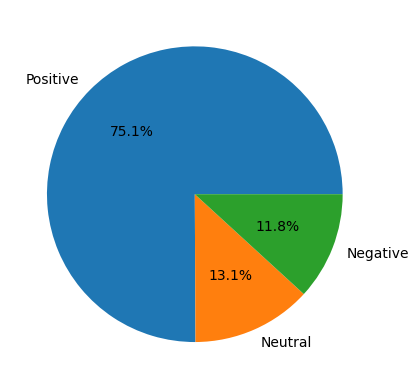

In [5]:
division_count = list(data["division"].value_counts())
my_labels = ["Positive","Neutral","Negative"]
plt.pie(division_count,labels= my_labels,autopct="%1.1f%%")
plt.show

In [6]:
data = data.drop("division",axis=1)
data = data.drop("Unnamed: 0",axis=1)

In [7]:
for i in range(len(data)):
    if data["polarity"][i]>0:
        data["polarity"][i] = np.ceil(data["polarity"][i])
        
    if data["polarity"][i]<0:
        data["polarity"][i]  = np.floor(data["polarity"][i])

C:\Users\priyavrat.sharma\AppData\Local\Temp\ipykernel_27552\655048680.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["polarity"][i] = np.ceil(data["polarity"][i])
C:\Users\priyavrat.sharma\AppData\Local\Temp\ipykernel_27552\655048

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
vectoriser = TfidfVectorizer()

In [9]:
X = vectoriser.fit_transform(data["review"])
Y = data["polarity"]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
svm_classifier = SVC()

In [12]:
svm_classifier.fit(x_train,y_train)

SVC()

In [13]:
y_pred = svm_classifier.predict(x_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

Accuracy: 0.8090575275397797

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.89      0.43      0.58        93
         0.0       0.91      0.24      0.38       127
         1.0       0.80      0.99      0.88       597

    accuracy                           0.81       817
   macro avg       0.87      0.55      0.61       817
weighted avg       0.83      0.81      0.77       817



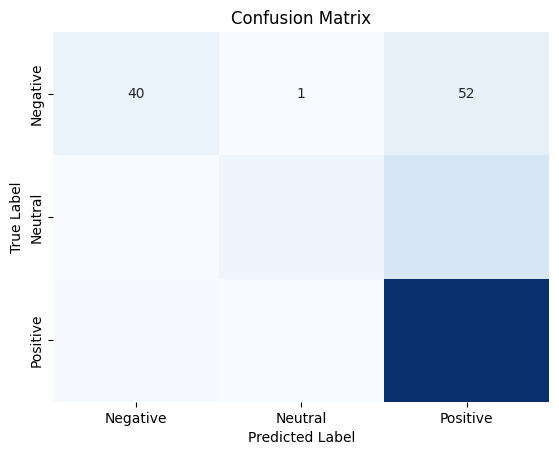

In [15]:
cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=my_labels[::-1],yticklabels=my_labels[::-1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()